<a href="https://colab.research.google.com/github/GitShamil/University_projects/blob/main/MNIST_sometestes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torch.nn as nn

In [76]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [77]:
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])

trainset = torchvision.datasets.MNIST(root='./data',train = True, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=10,shuffle = True, num_workers=2)

testset = torchvision.datasets.MNIST(root='./data',train = False, download=True, transform=transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=10,shuffle = True, num_workers=2)

clases = [i for i in range(10)]

In [78]:
class MyNet(nn.Module):
  def __init__(self):
    super(MyNet,self).__init__()
    self.conv1 = nn.Conv2d(1,6,5)
    self.conv2 = nn.Conv2d(6,16,5)
    self.pool = nn.MaxPool2d(kernel_size=2,stride=2)
    self.fc1 = nn.Linear(4*4*16,40)
    self.fc2 = nn.Linear(40,20)
    self.fc3 = nn.Linear(20,10)
  def forward(self,x):
    x = self.pool(nn.functional.relu(self.conv1(x)))
    x = self.pool(nn.functional.relu(self.conv2(x)))
    x = x.view(-1,4*4*16)
    x = nn.functional.relu(self.fc1(x))
    x = nn.functional.relu(self.fc2(x))
    return self.fc3(x)

In [79]:
net = MyNet().to(device)

In [80]:
from tqdm import tqdm_notebook

In [81]:
loss_fn = nn.CrossEntropyLoss()
optim = torch.optim.Adam(net.parameters(), lr = 1e-4)
loses =[]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


  0%|          | 0/2 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys


  0%|          | 0/6000 [00:00<?, ?it/s]

[1 ,   200] loss 2.304
[1 ,   400] loss 2.233
[1 ,   600] loss 1.927
[1 ,   800] loss 1.412
[1 ,  1000] loss 1.013
[1 ,  1200] loss 0.850
[1 ,  1400] loss 0.743
[1 ,  1600] loss 0.671
[1 ,  1800] loss 0.648
[1 ,  2000] loss 0.633
[1 ,  2200] loss 0.595
[1 ,  2400] loss 0.563
[1 ,  2600] loss 0.561
[1 ,  2800] loss 0.524
[1 ,  3000] loss 0.450
[1 ,  3200] loss 0.489
[1 ,  3400] loss 0.466
[1 ,  3600] loss 0.480
[1 ,  3800] loss 0.440
[1 ,  4000] loss 0.432
[1 ,  4200] loss 0.401
[1 ,  4400] loss 0.412
[1 ,  4600] loss 0.379
[1 ,  4800] loss 0.359
[1 ,  5000] loss 0.382
[1 ,  5200] loss 0.361
[1 ,  5400] loss 0.351
[1 ,  5600] loss 0.349
[1 ,  5800] loss 0.358
[1 ,  6000] loss 0.355


  0%|          | 0/6000 [00:00<?, ?it/s]

[2 ,   200] loss 0.316
[2 ,   400] loss 0.314
[2 ,   600] loss 0.353
[2 ,   800] loss 0.297
[2 ,  1000] loss 0.328
[2 ,  1200] loss 0.297
[2 ,  1400] loss 0.316
[2 ,  1600] loss 0.289
[2 ,  1800] loss 0.306
[2 ,  2000] loss 0.311
[2 ,  2200] loss 0.299
[2 ,  2400] loss 0.270
[2 ,  2600] loss 0.273
[2 ,  2800] loss 0.253
[2 ,  3000] loss 0.304
[2 ,  3200] loss 0.239
[2 ,  3400] loss 0.281
[2 ,  3600] loss 0.253
[2 ,  3800] loss 0.237
[2 ,  4000] loss 0.257
[2 ,  4200] loss 0.264
[2 ,  4400] loss 0.247
[2 ,  4600] loss 0.223
[2 ,  4800] loss 0.272
[2 ,  5000] loss 0.238
[2 ,  5200] loss 0.215
[2 ,  5400] loss 0.208
[2 ,  5600] loss 0.251
[2 ,  5800] loss 0.216
[2 ,  6000] loss 0.203


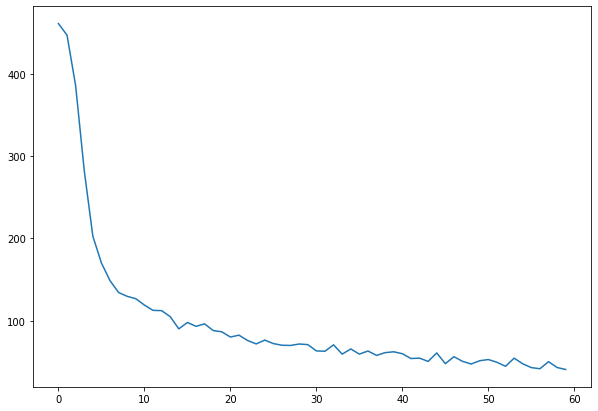

In [82]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(1,1,1)

for epoch in tqdm_notebook(range(2)):

  running_loss = 0.0
  for i, batch in enumerate(tqdm_notebook(trainloader)):
    Xbatch, Ybatch = batch

    optim.zero_grad()

    Ypred = net(Xbatch.to(device))

    loss = loss_fn(Ypred,Ybatch.to(device))
    
    loss.backward()

    optim.step()

    running_loss+=loss.item()

    if i % 200 == 199:
      print('[%d , %5d] loss %.3f' %  (epoch+1, i+1, running_loss/200))
      loses.append(running_loss)
      running_loss = 0.0
ax.clear()
ax.plot(np.arange(len(loses)),loses)
plt.show()

In [84]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

with torch.no_grad():
  for data in testloader:
    images, labels = data
    y_pred = net(images.to(device))
    _, predicated =torch.max(y_pred,1)
    c = predicated.cpu() == labels

    for i in range(10):
      label = labels[i]
      class_correct[label] +=c[i].item()
      class_total[label] +=1
for i in range(10):
  print('Accuracy of %5s : %2d %%' % (i,100*class_correct[i]/class_total[i]))

Accuracy of     0 : 97 %
Accuracy of     1 : 99 %
Accuracy of     2 : 91 %
Accuracy of     3 : 94 %
Accuracy of     4 : 89 %
Accuracy of     5 : 91 %
Accuracy of     6 : 94 %
Accuracy of     7 : 91 %
Accuracy of     8 : 92 %
Accuracy of     9 : 92 %
